## Building a Machine Learning Model To Predict CO2 Emissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, classification_report, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import sklearn

## Data Cleaning and Preparation

In [2]:
fuel_df = pd.read_csv('Fuel Consumption.csv') #loading the dataset

### Checking for null values

In [3]:
fuel_df.isna().sum() #checking empty values

MODEL_YEAR                   0
MAKE                         0
MODEL                        0
VEHICLE_CLASS                0
ENGINE_SIZE                  0
CYLINDERS                    0
TRANSMISSION                 0
FUEL_TYPE                    0
FUEL_CONSUMPTION_CITY        0
FUEL_CONSUMPTION_HWY         0
FUEL_CONSUMPTION_COMB        0
FUEL_CONSUMPTION_COMB_MPG    0
CO2_EMISSIONS                0
dtype: int64

In [4]:
#dataset has no null values nothing to replace
#set inplace argument to true(change is permanent)
fuel_df.dropna(inplace = True) 
fuel_df.isna().sum()

MODEL_YEAR                   0
MAKE                         0
MODEL                        0
VEHICLE_CLASS                0
ENGINE_SIZE                  0
CYLINDERS                    0
TRANSMISSION                 0
FUEL_TYPE                    0
FUEL_CONSUMPTION_CITY        0
FUEL_CONSUMPTION_HWY         0
FUEL_CONSUMPTION_COMB        0
FUEL_CONSUMPTION_COMB_MPG    0
CO2_EMISSIONS                0
dtype: int64

In [5]:
fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [6]:
#checking for duplicates
fuel_df.duplicated().sum()

0

In [7]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MODEL_YEAR                 5359 non-null   int64  
 1   MAKE                       5359 non-null   object 
 2   MODEL                      5359 non-null   object 
 3   VEHICLE_CLASS              5359 non-null   object 
 4   ENGINE_SIZE                5359 non-null   float64
 5   CYLINDERS                  5359 non-null   int64  
 6   TRANSMISSION               5359 non-null   object 
 7   FUEL_TYPE                  5359 non-null   object 
 8   FUEL_CONSUMPTION_CITY      5359 non-null   float64
 9   FUEL_CONSUMPTION_HWY       5359 non-null   float64
 10  FUEL_CONSUMPTION_COMB      5359 non-null   float64
 11  FUEL_CONSUMPTION_COMB_MPG  5359 non-null   int64  
 12  CO2_EMISSIONS              5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage:

### Checking the distribution

In [8]:
#finding duplicates
fuel_df.duplicated().sum()

0

# Question 2

### Categorising, Splitting and Scaling the Data

In [9]:
# X and y
X = fuel_df.drop('CO2_EMISSIONS', axis=1)
y = fuel_df['CO2_EMISSIONS']

In [10]:
# numerical and categorical columns
numerical_val = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_val = [x for x in X.columns if X[x].dtype==object]

In [11]:
# spliting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9)

In [12]:
# using MinMax Scaler
scaler = MinMaxScaler()

# fiting the scaler
X_train[numerical_val] = scaler.fit_transform(X_train[numerical_val])
X_val[numerical_val] = scaler.transform(X_val[numerical_val])

In [13]:
model_1 = LinearRegression()

model_1.fit(X_train[numerical_val], y_train)

preds = model_1.predict(X_val[numerical_val])

print('Mean Absolute Error:', mean_absolute_error(y_val, preds))
print('R2 Score:', r2_score(y_val, preds))

Mean Absolute Error: 15.976953924008882
R2 Score: 0.8632805827879108


In [14]:
#Subseting numerical features : ENGINE_SIZE and FUEL_CONSUMPTION_COMB_MPG

/var/folders/g2/9mhdxs7d6q1btr76jfgptqqr0000gn/T/ipykernel_3501/2702980966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmap=sns.heatmap(fuel_df.corr(), annot=True)


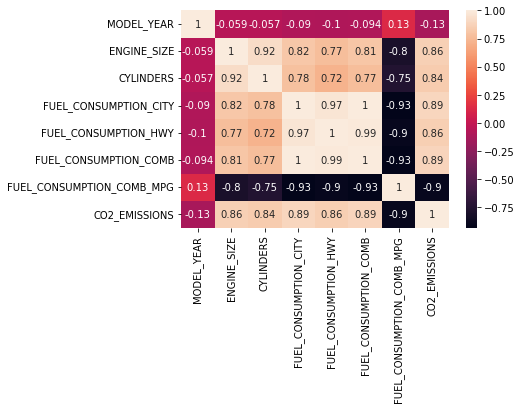

In [15]:
# plot correlation matrix
corrmap=sns.heatmap(fuel_df.corr(), annot=True)
plt.savefig('corrmap')

In [16]:
#  define model
model_2 = LinearRegression()

#  fit model
model_2.fit(X_train[['CYLINDERS', 'FUEL_CONSUMPTION_COMB_MPG']], y_train)

# making predictions
preds_2 = model_2.predict(X_val[['CYLINDERS', 'FUEL_CONSUMPTION_COMB_MPG']])

#metrics
print(mean_absolute_error(y_val, preds_2))
print(r2_score(y_val, preds_2))

16.39244366291204
0.8550275224790688


In [17]:
# define model
model_2 = LinearRegression()

#  fit model
model_2.fit(X_train[['ENGINE_SIZE', 'FUEL_CONSUMPTION_COMB_MPG']], y_train)

# making predictions
preds_2 = model_2.predict(X_val[['ENGINE_SIZE', 'FUEL_CONSUMPTION_COMB_MPG']])

#metrics
print(mean_absolute_error(y_val, preds_2))
print(r2_score(y_val, preds_2))

16.985461574862097
0.8437385686523412


# Question 3

In [18]:
#average emissions per year
fuel_df.groupby('MODEL_YEAR')['CO2_EMISSIONS'].mean()

MODEL_YEAR
2010    278.017476
2011    274.428571
2012    269.663611
2013    260.419593
2014    256.116713
Name: CO2_EMISSIONS, dtype: float64

In [19]:
#emissions are reducing from 2010 to 2014

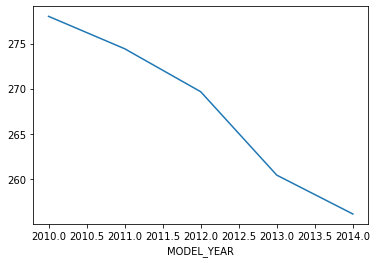

In [20]:
# plotting emissions by year.
emissmap = fuel_df.groupby('MODEL_YEAR')['CO2_EMISSIONS'].mean().plot(kind='line')
plt.savefig('emissmap')

In [21]:
#further analysis
fuel_df.groupby('MODEL_YEAR')['ENGINE_SIZE'].mean()

MODEL_YEAR
2010    3.556311
2011    3.576498
2012    3.560953
2013    3.423937
2014    3.342577
Name: ENGINE_SIZE, dtype: float64

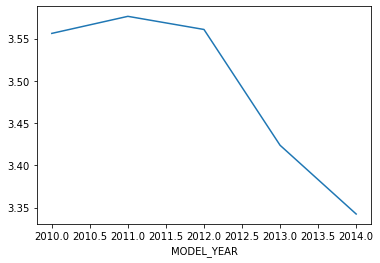

In [22]:
#ploting model year by engine size
emissmap2 = fuel_df.groupby('MODEL_YEAR')['ENGINE_SIZE'].mean().plot(kind='line')
plt.savefig('emissmap2')

Emissions are reducing due to engine getting smaller year-on-year

# Question 4

In [23]:
def ohe(train_set, val_set):

    cat_cols = [x for x in train_set.columns if train_set[x].dtype==object]

    encoder = OneHotEncoder(handle_unknown='ignore')

    train_cat_encoded = encoder.fit_transform(train_set[cat_cols]).toarray()
    val_cat_encoded = encoder.transform(val_set[cat_cols]).toarray()

    feature_names = encoder.get_feature_names_out()

    train_cat_encoded = pd.DataFrame(train_cat_encoded, columns=feature_names, 
                                   index=train_set.index)

    val_cat_encoded = pd.DataFrame(val_cat_encoded, columns=feature_names, 
                                 index=val_set.index)

    train_set_encoded = pd.concat([train_set, train_cat_encoded], axis=1)
    train_set_encoded.drop(cat_cols, axis=1, inplace=True)

    val_set_encoded = pd.concat([val_set, val_cat_encoded], axis=1)
    val_set_encoded.drop(cat_cols, axis=1, inplace=True)

    return train_set_encoded, val_set_encoded

## Classifying By Make

In [24]:
#feature matrix and target vector
X = fuel_df.drop('MAKE', axis=1)
y = fuel_df['MAKE']

# drop
X.drop(4300, inplace=True)
y.drop(4300, inplace=True)

#numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

#split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

#scaler
scaler = MinMaxScaler()

#fit scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#encoding
X_train_encoded, X_val_encoded = ohe(X_train, X_val)

#oversample(SMOTE)
over_sample = SMOTE(k_neighbors=1, random_state=20)
X_train_encoded, y_train = over_sample.fit_resample(X_train_encoded, y_train)

#Model definition
model_type = LogisticRegression(max_iter=500)

#fitting model
model_type.fit(X_train_encoded, y_train)

#classifications
types = model_type.predict(X_val_encoded)

#print report
print(classification_report(y_val, types))

               precision    recall  f1-score   support

        ACURA       1.00      1.00      1.00        11
 ASTON MARTIN       1.00      1.00      1.00         4
         AUDI       0.91      0.95      0.93        41
      BENTLEY       1.00      0.83      0.91         6
          BMW       0.85      0.96      0.90        73
        BUICK       0.94      1.00      0.97        17
     CADILLAC       1.00      0.89      0.94        28
    CHEVROLET       0.99      0.93      0.96       121
     CHRYSLER       0.88      0.79      0.83        19
        DODGE       0.88      0.95      0.92        40
      FERRARI       0.00      0.00      0.00         0
         FIAT       1.00      1.00      1.00         7
         FORD       1.00      0.97      0.98        87
          GMC       1.00      1.00      1.00        69
        HONDA       1.00      1.00      1.00        17
       HUMMER       1.00      1.00      1.00         3
      HYUNDAI       0.96      0.89      0.92        27
     INFI

/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classifying by  Model

In [25]:
#feature matrix and target vector
X = fuel_df.drop('MODEL', axis=1)
y = fuel_df['MODEL']

#numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

#splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

#scaler
scaler = MinMaxScaler()

#fitting scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#encodding
X_train_encoded, X_val_encoded = ohe(X_train, X_val)

#model definition 
model_type = LogisticRegression(max_iter=500)

#fitting model
model_type.fit(X_train_encoded, y_train)

#classifications
types = model_type.predict(X_val_encoded)

#print report
print(classification_report(y_val, types))

                                        precision    recall  f1-score   support

                        128i CABRIOLET       0.00      0.00      0.00         3
                            128i COUPE       0.00      0.00      0.00         0
                        135i CABRIOLET       0.00      0.00      0.00         2
                            135i COUPE       0.00      0.00      0.00         1
                            1500 (MDS)       0.00      0.00      0.00         1
              1500 4X4 (FuelSaver MDS)       0.00      0.00      0.00         2
                        1500 4X4 (MDS)       0.00      0.00      0.00         1
                          1500 4X4 FFV       0.00      0.00      0.00         1
                              1500 FFV       0.22      1.00      0.36         2
                          1500 FFV 4X4       0.00      0.00      0.00         2
                       200 CONVERTIBLE       0.00      0.00      0.00         0
                   200 CONVERTIBLE FFV 

/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/

## Classification based on Vehicle Class

In [26]:
#feature matrix and target vector
X = fuel_df.drop('VEHICLE_CLASS', axis=1)
y = fuel_df['VEHICLE_CLASS']

#numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

#splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

#scaler 
scaler = MinMaxScaler()

#fitting scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#encodding
X_train_encoded, X_val_encoded = ohe(X_train, X_val)

#oversample(SMOTE)
over_sample = SMOTE(k_neighbors=2, random_state=20)
X_train_encoded, y_train = over_sample.fit_resample(X_train_encoded, y_train)

#define model
model_type = LogisticRegression(max_iter=500)

#fit model
model_type.fit(X_train_encoded, y_train)

#make classifications
types = model_type.predict(X_val_encoded)

#print report
print(classification_report(y_val, types))

                          precision    recall  f1-score   support

                 COMPACT       0.87      0.78      0.82       148
               FULL-SIZE       0.93      0.82      0.87        79
                MID-SIZE       0.90      0.90      0.90       146
             MINICOMPACT       0.84      1.00      0.92        54
                 MINIVAN       1.00      0.90      0.95        20
    PICKUP TRUCK - SMALL       1.00      1.00      1.00        23
 PICKUP TRUCK - STANDARD       0.96      0.95      0.96        85
 SPECIAL PURPOSE VEHICLE       1.00      1.00      1.00         2
STATION WAGON - MID-SIZE       1.00      0.67      0.80         3
   STATION WAGON - SMALL       0.92      0.91      0.92        54
              SUBCOMPACT       0.85      0.90      0.87        92
                     SUV       0.93      0.91      0.92       156
             SUV - SMALL       0.79      0.90      0.84        58
          SUV - STANDARD       0.71      0.91      0.80        44
         

## Classifying by Transmission

In [27]:
#feature matrix and target vector
X = fuel_df.drop('TRANSMISSION', axis=1)
y = fuel_df['TRANSMISSION']

#numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

#splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

#scaler 
scaler = MinMaxScaler()

#fitting scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#encoding
X_train_encoded, X_val_encoded = ohe(X_train, X_val)

#model definition
model_type = LogisticRegression(max_iter=500)

#fit model
model_type.fit(X_train_encoded, y_train)

#classifications
types = model_type.predict(X_val_encoded)

#print report
print(classification_report(y_val, types))

              precision    recall  f1-score   support

          A4       0.88      0.67      0.76       102
          A5       0.70      0.73      0.71        51
          A6       0.70      0.70      0.70       184
          A7       0.56      0.45      0.50        20
          A8       0.76      0.80      0.78        40
          A9       1.00      1.00      1.00         2
         AM5       0.00      0.00      0.00         2
         AM6       0.00      0.00      0.00         5
         AM7       0.33      0.20      0.25        25
         AS4       0.00      0.00      0.00        13
         AS5       0.50      0.43      0.46        30
         AS6       0.65      0.76      0.70       210
         AS7       0.58      0.64      0.61        67
         AS8       0.81      0.79      0.80        33
          AV       0.69      0.60      0.64        60
         AV6       0.50      0.33      0.40         3
         AV7       0.00      0.00      0.00         1
         AV8       0.00    

/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sena/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classifying by Fuel Type

In [28]:
#feature matrix and target vector
X = fuel_df.drop('FUEL_TYPE', axis=1)
y = fuel_df['FUEL_TYPE']

#numerical and categorical columns
numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

#splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

#scaler 
scaler = MinMaxScaler()

#fitting scaler
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#encodding
X_train_encoded, X_val_encoded = ohe(X_train, X_val)

#oversample(SMOTE)
over_sample = SMOTE(k_neighbors=2, random_state=20)
X_train_encoded, y_train = over_sample.fit_resample(X_train_encoded, y_train)

#model definition
model_type = LogisticRegression(max_iter=500)

#fitting model
model_type.fit(X_train_encoded, y_train)

#classifications
types = model_type.predict(X_val_encoded)

#print report
print(classification_report(y_val, types))

              precision    recall  f1-score   support

           D       0.94      1.00      0.97        15
           E       0.99      1.00      0.99        99
           X       0.96      0.97      0.96       539
           Z       0.96      0.95      0.95       419

    accuracy                           0.96      1072
   macro avg       0.96      0.98      0.97      1072
weighted avg       0.96      0.96      0.96      1072



From all of the classification models built, it can be seen that fuel type best classifies the dataset

## Notes

To avoid overfitting, we take several measures. First, we use a validation set when training the model to ensure that the model is not overfit to the training data. We also use regularization techniques such as L1 and L2 regularization to prevent the model from fitting too closely to the training data. We also monitor the performance of the model on the validation set and adjust the model if necessary to improve its generalization to new data.

In this analysis, we are most interested in the mean absolute error and R2 score as performance measures for the regression model. These measures give us a sense of how well the model is able to predict the CO2 emissions based on the predictor variables, and how much of the variance in the dependent variable is explained by the predictor variables.

Based on the performance of the model, it could potentially be deployed in a real-world setting. The model is able to predict CO2 emissions with a relatively low mean absolute error, and the R2 score indicates that a significant proportion of the variance in the dependent variable is explained by the predictor variables. However, further testing and evaluation would be necessary to ensure that the model is robust and performs well on new data.

In [29]:
#Select numerical columns from dataframe

numerical = fuel_df[numerical_columns]

#Create a StandardScaler object

scaler = StandardScaler()

#Fit and transform the numerical data using the scaler

scaled_num = scaler.fit_transform(numerical)

#Create a KMeans model with 7 clusters

cluster_model = KMeans(n_clusters=7)

#Fit and predict cluster labels for the scaled data

cluster_labels = cluster_model.fit_predict(scaled_num)

#Add the predicted cluster labels to the original dataframe as a new column

fuel_df['CLUSTER'] = cluster_labels

In [30]:
# Define the columns to be encoded
categorical_columns = ['FUEL_TYPE', 'MAKE', 'MODEL', 'TRANSMISSION', 'VEHICLE_CLASS']

# Create an empty list to store the encoded data
encoded_data = []

# Loop through each categorical column
for col in categorical_columns:
    # Create a OneHotEncoder object
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Fit and transform the data using the encoder
    encoded = encoder.fit_transform(fuel_df[col].values.reshape(-1, 1)).toarray()

    # Get the names of the encoded features
    feature_names = encoder.get_feature_names_out()

    # Create a dataframe for the encoded data
    encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_df[col].index)

    # Append the encoded data to the list
    encoded_data.append(encoded)

# Loop through the encoded data and calculate the Davies-Bouldin score for each
for data, col in zip(encoded_data, categorical_columns):
    score = davies_bouldin_score(data, fuel_df['CLUSTER'])
    print(f"Davies-Bouldin score for {col}: {score:.2f}")


Davies-Bouldin score for FUEL_TYPE: 29.13
Davies-Bouldin score for MAKE: 15.43
Davies-Bouldin score for MODEL: 28.14
Davies-Bouldin score for TRANSMISSION: 10.70
Davies-Bouldin score for VEHICLE_CLASS: 7.83


VEHICLE CLASS forms the best clusters